In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/UNSW_NB15_testing-set.csv
/kaggle/input/dataset/UNSW_NB15_training-set.csv
/kaggle/input/gemma/transformers/2b/2/model.safetensors.index.json
/kaggle/input/gemma/transformers/2b/2/gemma-2b.gguf
/kaggle/input/gemma/transformers/2b/2/config.json
/kaggle/input/gemma/transformers/2b/2/model-00001-of-00002.safetensors
/kaggle/input/gemma/transformers/2b/2/model-00002-of-00002.safetensors
/kaggle/input/gemma/transformers/2b/2/tokenizer.json
/kaggle/input/gemma/transformers/2b/2/tokenizer_config.json
/kaggle/input/gemma/transformers/2b/2/special_tokens_map.json
/kaggle/input/gemma/transformers/2b/2/.gitattributes
/kaggle/input/gemma/transformers/2b/2/tokenizer.model
/kaggle/input/gemma/transformers/2b/2/generation_config.json


In [2]:
training_data = pd.read_csv("/kaggle/input/dataset/UNSW_NB15_training-set.csv")
testing_data = pd.read_csv("/kaggle/input/dataset/UNSW_NB15_testing-set.csv")

In [3]:
training_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
testing_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
combined_dataset = pd.concat([training_data, testing_data], ignore_index = True)

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [8]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [9]:
df = combined_dataset.copy()

In [10]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [11]:
selected_columns = [
    "ct_flw_http_mthd",
    "state",
    "sbytes","dbytes",
    "rate",
    "spkts", "dpkts",
    "label"
]

df = df[selected_columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ct_flw_http_mthd  257673 non-null  int64  
 1   state             257673 non-null  object 
 2   sbytes            257673 non-null  int64  
 3   dbytes            257673 non-null  int64  
 4   rate              257673 non-null  float64
 5   spkts             257673 non-null  int64  
 6   dpkts             257673 non-null  int64  
 7   label             257673 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 15.7+ MB


In [13]:
df.dropna(inplace = True)

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123659 entries, 0 to 257669
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ct_flw_http_mthd  123659 non-null  int64  
 1   state             123659 non-null  object 
 2   sbytes            123659 non-null  int64  
 3   dbytes            123659 non-null  int64  
 4   rate              123659 non-null  float64
 5   spkts             123659 non-null  int64  
 6   dpkts             123659 non-null  int64  
 7   label             123659 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 8.5+ MB


In [16]:
df['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO', 'ECO', 'PAR',
       'URN', 'no'], dtype=object)

In [17]:
state_mapping = {
    "INT": "Interrupted",
    "FIN": "Finished",
    "REQ": "Request Sent",
    "ACC": "Acknowledged",
    "CON": "Connected",
    "RST": "Reset",
    "CLO": "Closed",
    "ECO": "Echo",
    "PAR": "Partial",
    "URN": "Unknown Response",
    "no": "No Connection"
}

df["state"] = df["state"].map(state_mapping)
df['state'] = df['state'].astype('string')

In [18]:
df.head()

,ct_flw_http_mthd,state,sbytes,dbytes,rate,spkts,dpkts,label
0,0,Interrupted,496,0,90909.0902,2,0,0
1,0,Interrupted,1762,0,125000.0003,2,0,0
2,0,Interrupted,1068,0,200000.0051,2,0,0
3,0,Interrupted,900,0,166666.6608,2,0,0
4,0,Interrupted,2126,0,100000.0025,2,0,0


In [19]:
df['state'].unique()

<StringArray>
[     'Interrupted',         'Finished',     'Request Sent',
     'Acknowledged',        'Connected',            'Reset',
           'Closed',             'Echo',          'Partial',
 'Unknown Response',    'No Connection']
Length: 11, dtype: string

In [20]:
df['label'].value_counts()

label
0    67937
1    55722
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

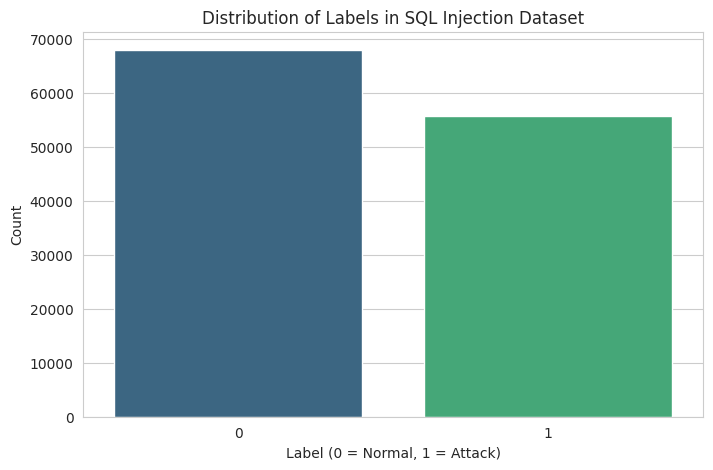

In [22]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'label', palette = 'viridis')
plt.title('Distribution of Labels in SQL Injection Dataset')
plt.xlabel('Label (0 = Normal, 1 = Attack)')
plt.ylabel('Count')
plt.show()

In [23]:
sample_counts = df['label'].value_counts()
min_class_count = sample_counts.min()

class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]

class_0_downsampled = class_0.sample(n = min_class_count, random_state = 42)
class_1_downsampled = class_1.sample(n = min_class_count, random_state = 42)

balanced_data = pd.concat([class_0_downsampled, class_1_downsampled])
balanced_data['label'].value_counts()

label
0    55722
1    55722
Name: count, dtype: int64

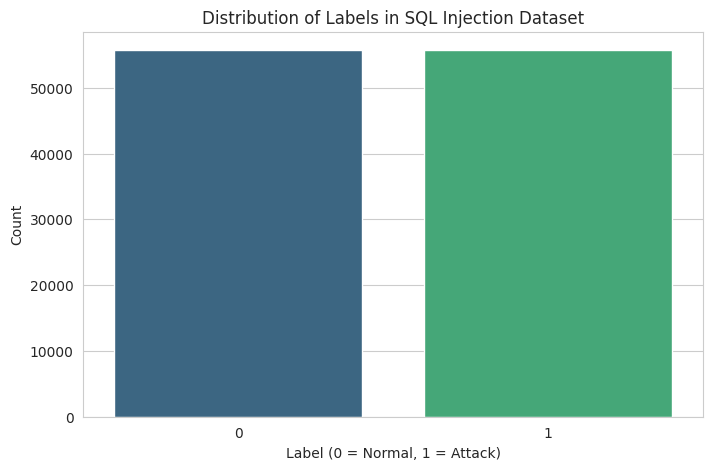

In [24]:
plt.figure(figsize = (8, 5))
sns.set_style('whitegrid')
sns.countplot(data = balanced_data, x = 'label', palette = 'viridis')
plt.title('Distribution of Labels in SQL Injection Dataset')
plt.xlabel('Label (0 = Normal, 1 = Attack)')
plt.ylabel('Count')
plt.show()

In [25]:
balanced_data.describe()

,ct_flw_http_mthd,sbytes,dbytes,rate,spkts,dpkts,label
count,111444.000000,1.114440e+05,1.114440e+05,1.114440e+05,111444.000000,111444.000000,111444.000000
mean,0.224077,1.786102e+04,2.825472e+04,7.910886e+03,36.208105,35.946601,0.500000
std,0.610209,2.598871e+05,2.087916e+05,4.773216e+04,200.808165,158.776502,0.500002
min,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,7.560000e+02,3.120000e+02,2.187394e+01,10.000000,6.000000,0.000000
50%,0.000000,1.138000e+03,8.240000e+02,3.927501e+01,12.000000,10.000000,0.500000
75%,0.000000,2.958000e+03,3.742000e+03,2.946270e+02,26.000000,22.000000,1.000000
max,30.000000,1.435577e+07,1.465753e+07,1.000000e+06,10646.000000,11018.000000,1.000000


In [26]:
import numpy as np

def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

numeric_cols = ["ct_flw_http_mthd", "sbytes", "dbytes", "rate", "spkts", "dpkts"]

balanced_data = remove_outliers(balanced_data, numeric_cols)

In [27]:
balanced_data['label'].value_counts()

label
1    21545
0    10077
Name: count, dtype: int64

In [28]:
balanced_data.describe()

,ct_flw_http_mthd,sbytes,dbytes,rate,spkts,dpkts,label
count,31622.0,31622.000000,31622.000000,31622.000000,31622.000000,31622.000000,31622.000000
mean,0.0,1062.606065,501.788312,26.225302,10.395421,7.523338,0.681329
std,0.0,981.586117,552.287845,15.571016,1.091026,1.350410,0.465968
min,0.0,324.000000,142.000000,0.263065,7.000000,3.000000,0.000000
25%,0.0,564.000000,268.000000,16.280594,10.000000,6.000000,0.000000
50%,0.0,652.000000,354.000000,22.918393,10.000000,8.000000,1.000000
75%,0.0,1068.000000,480.000000,30.787374,10.000000,8.000000,1.000000
max,0.0,8148.000000,6924.000000,142.935596,14.000000,11.000000,1.000000


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_cols = ["ct_flw_http_mthd", "sbytes", "dbytes", "rate", "spkts", "dpkts"]

balanced_data[numeric_cols] = scaler.fit_transform(balanced_data[numeric_cols])

In [30]:
print(balanced_data[numeric_cols].min())
print(balanced_data[numeric_cols].max())

ct_flw_http_mthd    0.0
sbytes              0.0
dbytes              0.0
rate                0.0
spkts               0.0
dpkts               0.0
dtype: float64
ct_flw_http_mthd    0.0
sbytes              1.0
dbytes              1.0
rate                1.0
spkts               1.0
dpkts               1.0
dtype: float64


In [31]:
balanced_data['label'].value_counts()

label
1    21545
0    10077
Name: count, dtype: int64

In [32]:
print(balanced_data['state'].dtype)

string


In [33]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31622 entries, 68824 to 53550
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ct_flw_http_mthd  31622 non-null  float64
 1   state             31622 non-null  string 
 2   sbytes            31622 non-null  float64
 3   dbytes            31622 non-null  float64
 4   rate              31622 non-null  float64
 5   spkts             31622 non-null  float64
 6   dpkts             31622 non-null  float64
 7   label             31622 non-null  int64  
dtypes: float64(6), int64(1), string(1)
memory usage: 2.2 MB


In [34]:
import pandas as pd

# First, verify class distribution
class_counts = balanced_data['label'].value_counts()
print("Original class distribution:\n", class_counts)

# Check if we have enough samples in both classes
assert class_counts[0] >= 5000, "Not enough class 0 samples"
assert class_counts[1] >= 5000, "Not enough class 1 samples"

# Create balanced sample
balanced_sample = pd.concat([
    balanced_data[balanced_data['label'] == 0].sample(n=5000, random_state=42),
    balanced_data[balanced_data['label'] == 1].sample(n=5000, random_state=42)
])

# Shuffle the final dataset
balanced_data = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify final distribution
print("\nBalanced sample distribution:")
print(balanced_data['label'].value_counts())

Original class distribution:
 label
1    21545
0    10077
Name: count, dtype: int64

Balanced sample distribution:
label
1    5000
0    5000
Name: count, dtype: int64


In [35]:
balanced_data['label'].value_counts()

label
1    5000
0    5000
Name: count, dtype: int64

In [36]:
balanced_data.to_csv('Cleaned_SQL_Injection_Data.csv')

In [37]:
import json

jsonl_file_path = "Cleaned_SQL_Injection_Data.jsonl"

with open(jsonl_file_path, "w", encoding="utf-8") as jsonl_file:
    jsonl_file.writelines(
        json.dumps({
            "input": f"HTTP Method Count: {row['ct_flw_http_mthd']}, State: {row['state']}, "
                     f"Source Bytes: {row['sbytes']}, Destination Bytes: {row['dbytes']}, Rate: {row['rate']}, "
                     f"Source Packets: {row['spkts']}, Destination Packets: {row['dpkts']}",
            "label": int(row["label"])  # Ensure label is stored as an integer
        }) + "\n"
        for _, row in balanced_data.iterrows()
    )

print(f"JSONL file saved as: {jsonl_file_path}")


JSONL file saved as: Cleaned_SQL_Injection_Data.jsonl


In [38]:
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install torch
!pip install peft
!pip install bitsandbytes
!pip install evaluate
!pip install datasets
!pip install accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [39]:
import torch
from datasets import Dataset, load_dataset
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training, get_peft_model
from transformers import (
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback,
    DataCollatorWithPadding
)
import bitsandbytes as bnb
import evaluate
import random

In [40]:
from datasets import load_dataset, DatasetDict, concatenate_datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
dataset = load_dataset("json", data_files="/kaggle/working/Cleaned_SQL_Injection_Data.jsonl")["train"]

# Split classes and balance them
class_0 = dataset.filter(lambda example: example["label"] == 0)
class_1 = dataset.filter(lambda example: example["label"] == 1)

# Find minimum class count
min_count = min(len(class_0), len(class_1))

# Create balanced dataset
balanced_dataset = concatenate_datasets([
    class_0.select(range(min_count)),
    class_1.select(range(min_count)).shuffle(seed=42)
]).shuffle(seed=42)

# Verify balanced distribution
print("Balanced class counts:", np.bincount(balanced_dataset["label"]))

# Create stratified splits
train_idx, test_idx = train_test_split(
    np.arange(len(balanced_dataset)),
    test_size=0.1,
    stratify=balanced_dataset["label"],
    random_state=42,
    shuffle=True
)

# Create DatasetDict
split_dataset = DatasetDict({
    "train": balanced_dataset.select(train_idx),
    "test": balanced_dataset.select(test_idx)
})

# Verify splits
print("\nTraining distribution:")
print(np.bincount(split_dataset["train"]["label"]))
print("Test distribution:")
print(np.bincount(split_dataset["test"]["label"]))

Generating train split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10000 [00:00<?, ? examples/s]

Balanced class counts: [5000 5000]

Training distribution:
[4500 4500]
Test distribution:
[500 500]


In [41]:

def preprocess(batch):
    return tokenizer(
        batch["input"], 
        truncation=True, 
        padding="max_length",  # Ensures uniform length
        max_length=128,        # Prevents excessive tokenization
        return_tensors="pt"    # Returns PyTorch tensors
    )


In [42]:
model_name = '/kaggle/input/gemma/transformers/2b/2'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [43]:
train_data = split_dataset['train']
test_data = split_dataset['test']

tokenized_train_data = train_data.map(preprocess, batched = True)
tokenized_test_data = test_data.map(preprocess, batched = True)

Map:   0%|          | 0/9000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [44]:
id2label = {0 : 'SAFE', 1 : 'MALICIOUS' }
label2id = {'SAFE' : 0, 'MALICIOUS' : 1}

In [45]:
data_collator = DataCollatorWithPadding(tokenizer = tokenizer)

In [46]:
import numpy as np
import evaluate

# Define evaluation metrics
metric = evaluate.combine(["accuracy", "f1", "precision", "recall"])

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Convert to numpy arrays (ensure compatibility with metric functions)
    predictions = np.array(predictions)
    labels = np.array(labels)

    # Convert logits to class indices
    predictions = np.argmax(predictions, axis=1)

    # Error handling: Check if predictions and labels are valid
    if predictions.size == 0 or labels.size == 0:
        raise ValueError("Predictions or labels are empty. Check your evaluation dataset and output format.")

    # Compute and return the metrics
    return metric.compute(predictions=predictions, references=labels)


In [47]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit = True,
    bnb_4bit_use_double_quant = True,
    bnb_4bit_quant_type = 'nf4',
    bnb_4bit_compute_dtype = torch.bfloat16
)

In [48]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels = 2,
    id2label = id2label,
    label2id = label2id,
    quantization_config = bnb_config,
    device_map = 'auto'
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of GemmaForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/gemma/transformers/2b/2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
model.gradient_checkpointing_enable()

In [50]:
model = prepare_model_for_kbit_training(model)

In [51]:
def find_linear_names(model):
    """
    This function identifies all linear layer names within a model that use 4-bit quantization.
    Args:
        model (torch.nn.Module): The PyTorch model to inspect.
    Returns:
        list: A list containing the names of all identified linear layers with 4-bit quantization.
    """
    cls = bnb.nn.Linear4bit  

    # Set to store identified layer names
    lora_module_names = set()

    # Iterate through named modules in the model
    for name, module in model.named_modules():
        # Check if the current module is an instance of the 4-bit linear layer class
        if isinstance(module, cls):
            names = name.split('.')
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])

        # Special case: remove 'lm_head' if present
        if 'lm_head' in lora_module_names: 
            lora_module_names.remove('lm_head')
    return list(lora_module_names)

# Example usage:
modules = find_linear_names(model)
print(modules)

['v_proj', 'o_proj', 'q_proj', 'gate_proj', 'down_proj', 'up_proj', 'k_proj']


In [52]:
lora_config = LoraConfig(
    r=32,  # Reduction factor (lower r means more parameters in the adapter)
    lora_alpha=32,  # Dimensionality of the adapter projection
    target_modules=modules,  # List of modules to apply the LoRA adapter
    lora_dropout=0.05,  # Dropout rate for the adapter
    bias="none",  # Bias configuration for the adapter
    task_type="SEQ_CLS"  # Task type (sequence classification in this case)
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()


trainable params: 39,227,392 || all params: 2,545,403,904 || trainable%: 1.5411


In [53]:
training_args = TrainingArguments(
    output_dir="epoch_weights",  # Output directory for checkpoints
    learning_rate=2e-5,  # Learning rate for the optimizer
    per_device_train_batch_size=8,  # Batch size per device
    per_device_eval_batch_size=8,  # Batch size per device for evaluation 
    num_train_epochs=1,  # Number of training epochs
    weight_decay=0.01,  # Weight decay for regularization
    evaluation_strategy='epoch',  # Evaluate after each epoch
    save_strategy="epoch",  # Save model checkpoints after each epoch
    load_best_model_at_end=True,  # Load the best model based on the chosen metric
    push_to_hub=False,  # Disable pushing the model to the Hugging Face Hub 
    report_to="none",  # Disable logging to Weight&Bias
    metric_for_best_model='eval_loss')# Metric for selecting the best model requires_grad = True

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1609: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [54]:
early_stop = EarlyStoppingCallback(early_stopping_patience=1, early_stopping_threshold=.0)

In [55]:
if test_data is None:
    raise ValueError("Error: Test set is missing! Check dataset size or splitting logic.")

# Rename columns safely
if "label" in train_data.column_names:
    train_data = train_data.rename_column("label", "labels")

if "label" in test_data.column_names:
    test_data = test_data.rename_column("label", "labels")

# Print dataset details
print("Train Data:", train_data)
print("Test Data:", test_data)

Train Data: Dataset({
    features: ['input', 'labels'],
    num_rows: 9000
})
Test Data: Dataset({
    features: ['input', 'labels'],
    num_rows: 1000
})


In [56]:
trainer = Trainer(
    model=model, 
    args=training_args,  
    train_dataset=tokenized_train_data,
    eval_dataset=tokenized_test_data, 
    tokenizer=tokenizer,
    data_collator=data_collator,  
    compute_metrics=compute_metrics, 
    callbacks=[early_stop],
    
)

trainer.train()

<ipython-input-56-44b004de8483>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:632: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  ret

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.518800,0.497645,0.758000,0.731707,0.820896,0.660000


TrainOutput(global_step=1125, training_loss=0.5413121948242188, metrics={'train_runtime': 2573.5829, 'train_samples_per_second': 3.497, 'train_steps_per_second': 0.437, 'total_flos': 1.3969953128448e+16, 'train_loss': 0.5413121948242188, 'epoch': 1.0})

In [57]:
new_model = "Finetuned_Gemma_Model"

# Save the model
trainer.model.save_pretrained(new_model)

# Save the tokenizer
tokenizer.save_pretrained(new_model)

print("Model and tokenizer saved successfully!")


Model and tokenizer saved successfully!


In [58]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Define the model path (where you saved it)
model_path = "Finetuned_Gemma_Model"

# Load the fine-tuned model
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

print("Model and tokenizer loaded successfully!")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of GemmaForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/gemma/transformers/2b/2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and tokenizer loaded successfully!


In [59]:
print(model.config)


GemmaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "/kaggle/input/gemma/transformers/2b/2",
  "architectures": [
    "GemmaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 2,
  "eos_token_id": 1,
  "head_dim": 256,
  "hidden_act": "gelu",
  "hidden_activation": null,
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 16384,
  "max_position_embeddings": 8192,
  "model_type": "gemma",
  "num_attention_heads": 8,
  "num_hidden_layers": 18,
  "num_key_value_heads": 1,
  "pad_token_id": 0,
  "rms_norm_eps": 1e-06,
  "rope_scaling": null,
  "rope_theta": 10000.0,
  "torch_dtype": "float32",
  "transformers_version": "4.50.0.dev0",
  "use_cache": true,
  "vocab_size": 256000
}



Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Accuracy: 0.7140
Precision: 0.7202
Recall: 0.7140
F1-score: 0.7120

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.63      0.69       500
           1       0.68      0.80      0.74       500

    accuracy                           0.71      1000
   macro avg       0.72      0.71      0.71      1000
weighted avg       0.72      0.71      0.71      1000



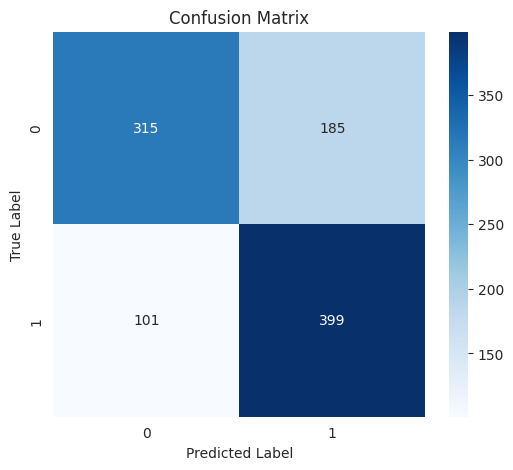

In [62]:
import torch
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Set model to evaluation mode
model.eval()

# Ensure test_data column names match
if "label" not in test_data.column_names and "labels" in test_data.column_names:
    test_data = test_data.rename_column("labels", "label")

# Move model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Reduce model precision (HALVES MEMORY USAGE)
if device.type == "cuda":
    model.half()

# Tokenize dataset in advance (SAVES MEMORY & COMPUTATION TIME)
def tokenize_fn(example):
    return tokenizer(example["input"], truncation=True, padding="max_length", max_length=128)

test_data = test_data.map(tokenize_fn, batched=True, batch_size=16)  # Process in small batches

# Modified predict function returns predictions instead of modifying Dataset
def predict(batch):
    inputs = {
        "input_ids": torch.tensor(batch["input_ids"], dtype=torch.long).to(device),
        "attention_mask": torch.tensor(batch["attention_mask"]).to(device)
    }

    if device.type == "cuda":
        inputs["attention_mask"] = inputs["attention_mask"].half()

    with torch.no_grad():
        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1).cpu().numpy().tolist()

    # Free memory
    torch.cuda.empty_cache()
    gc.collect()
    
    return preds  # Return just the predictions

# Process test data in small batches
batch_size = 8
predictions = []
for i in range(0, len(test_data), batch_size):
    batch = test_data.select(range(i, min(i + batch_size, len(test_data))))
    batch_preds = predict(batch)  # Get predictions for this batch
    predictions.extend(batch_preds)  # Collect predictions directly

# Now add predictions to dataset if needed (optional)
test_data = test_data.add_column("predicted_label", predictions)

# Convert labels to lists (now using the dataset's original labels)
true_labels = test_data["label"]
pred_labels = predictions  # Directly use collected predictions

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average="weighted")

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(true_labels, pred_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(true_labels), yticklabels=set(true_labels))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
